In [ ]:
#Use the diamonds.csv file and begin your exploratory data analysis (EDA) and ddata cleaning/preparation. 
#Upload your completed Jupyter notebook to Gihub and submit the URL to your Github repository here. 

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#load csv file data with headers

location = "datasets/diamonds.csv"
df = pd.read_csv(location)

In [3]:
#get preview of data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#get data types of variables
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [5]:
#drop Unnamed column/variable
df=pd.read_csv((location), index_col=0)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#find missing values
#doesn't do anything on its own
filename = "datasets/diamonds.csv"
df_missing = pd.read_csv(filename)


In [8]:
#find the sum of all missing values for each variable
df_missing.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
#number of non-NA values
df.count()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

In [10]:
#see the last 5 rows of the data
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [11]:
#descriptive stats for all of data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#get median for carat
df['carat'].median()

0.7

In [13]:
#get median for price
df['price'].median()

2401.0

In [15]:
#see average price by cut
df.groupby('cut')
df['price'].groupby(df['cut']).mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [16]:
#see average price by color 
df.groupby('color')
df['price'].groupby(df['color']).mean()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [17]:
#Define price bins as 326-1000, 1001-5000, 50001- 10000, 10000-18823 
bins = [325, 1000, 5000, 10000, 18823]

# Create names for the four groups
price_group = ['Low', 'Medium', 'High', 'Too High']

#make new column with letter grades
df['price_type'] = pd.cut(df['price'], bins, labels=price_group)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_type
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Low
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Low
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Low
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Low
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Low


In [18]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_type
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Medium
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Medium
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Medium
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Medium
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,Medium


In [19]:
#number of observation per price group/type
pd.value_counts (df['price_type'])

Medium      24702
Low         14524
High         9492
Too High     5222
Name: price_type, dtype: int64

In [20]:
#average carat by price type
df.groupby('price_type')['carat'].mean()

price_type
Low         0.334937
Medium      0.712814
High        1.209044
Too High    1.741111
Name: carat, dtype: float64

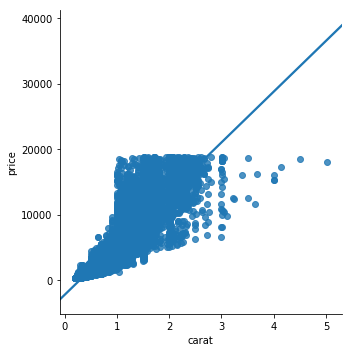

In [21]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.lmplot (x='carat', y='price', data=df)

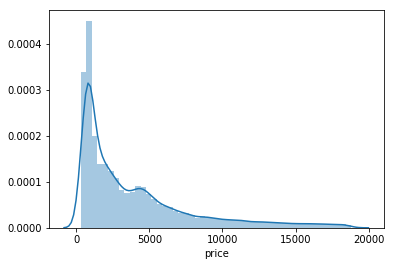

In [22]:
#create a histogram of the distribution of price
sns.distplot (df['price'])

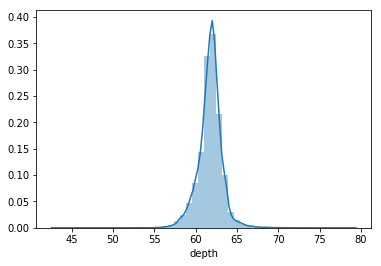

In [23]:
#a histogram of the distribution of depth
sns.distplot (df['depth'])

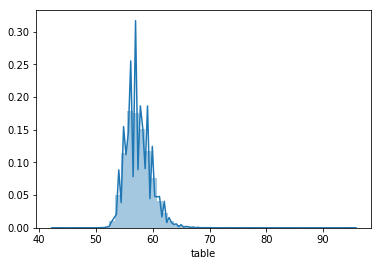

In [24]:
#a histogram of the distribution of tableS
sns.distplot (df['table'])

In [25]:
#run correlation 
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [26]:
import statsmodels.formula.api as smf

In [27]:
#run regression with price as the independent variable
result = smf.ols ('price ~ carat +  depth + table + x + y + z',  data=df).fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:38:56   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#set coefficient to 0
result = smf.ols ('price ~ carat +  depth + table + x + y + z - 1',  data=df).fit()

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.120e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:43:09   Log-Likelihood:            -4.7196e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53934   BIC:                         9.440e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9533.9516     59.317    160.730      0.000    9417.691    9650.213
depth         28.2911      2.416     11.712      0.000      23.556      33.026
table        -18.8220      2.558     -7.358      0.000     -23.836     -13.808
x           -522.6300     40.351    -12.952      0.000    -601.718    -443.542
y            182.3295     25.907      7.038      0.000     131.552     233.107
z           -676.7502     42.361    -15.976      0.000    -759.778    -593.722
==============================================================================
Omnibus:                    14555.339   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287131.956
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      14.186   Cond. No.                         829.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#run regression with fewer variables 

result = smf.ols ('price ~ carat +  depth',  data=df).fit()

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:50:35   Log-Likelihood:            -4.7249e+05
No. Observations:               53940   AIC:                         9.450e+05
Df Residuals:                   53937   BIC:                         9.450e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4045.3332    286.205     14.134      0.000    3484.368    4606.298
carat       7765.1407     14.009    554.282      0.000    7737.682    7792.599
depth       -102.1653      4.635    -22.041      0.000    -111.251     -93.080
==============================================================================
Omnibus:                    14148.858   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148236.675
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                      10.890   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#set correlation to 0
result = smf.ols ('price ~ carat +  depth - 1 ',  data=df).fit()

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 3.278e+05
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:51:18   Log-Likelihood:            -4.7259e+05
No. Observations:               53940   AIC:                         9.452e+05
Df Residuals:                   53938   BIC:                         9.452e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       7767.2855     14.034    553.449      0.000    7739.778    7794.793
depth        -36.7162      0.211   -174.107      0.000     -37.130     -36.303
==============================================================================
Omnibus:                    14048.654   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152167.333
Skew:                           0.943   Prob(JB):                         0.00
Kurtosis:                      11.009   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

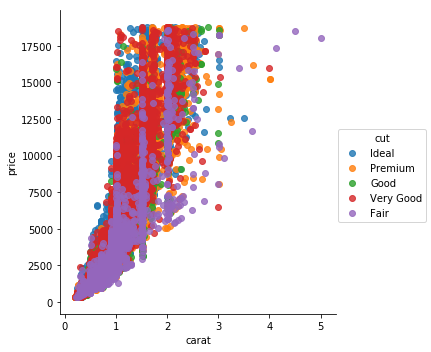

In [35]:
#add more details to scatterplot 
sns.lmplot(x='carat', y='price', data=df,
          fit_reg=False, #remove regression line
          hue ='cut') #color by cut

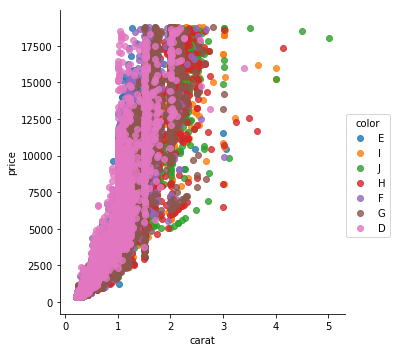

In [36]:
sns.lmplot(x='carat', y='price', data=df,
          fit_reg=False, #remove regression line
          hue ='color') #color by color

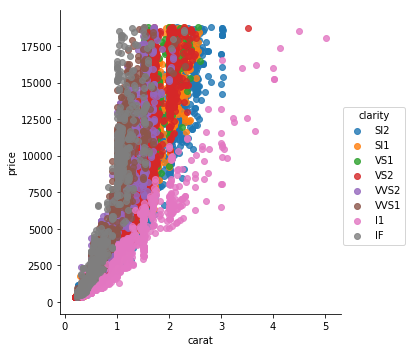

In [37]:
sns.lmplot(x='carat', y='price', data=df,
          fit_reg=False, #remove regression line
          hue ='clarity') #color by clarity

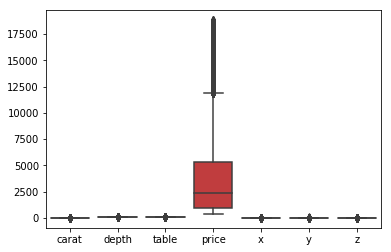

In [42]:
#boxplot showing stats for each characteristic 
sns.boxplot(data=df)

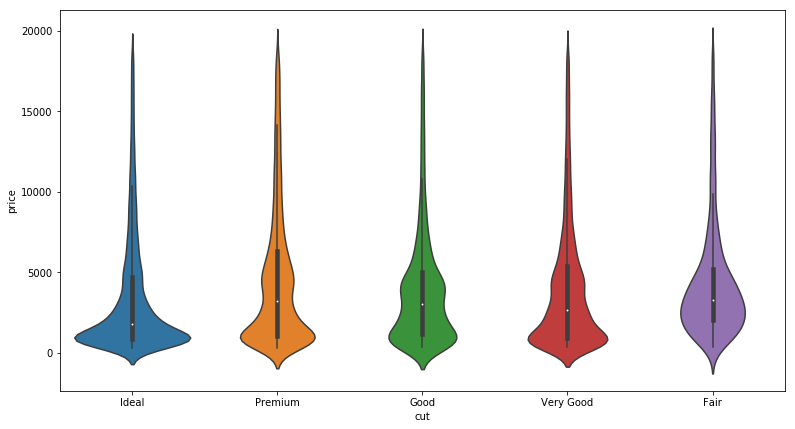

In [43]:
#change size of plot
plt.subplots(figsize=(13,7))
#violin plot shows the distribution of price for each cut
sns.violinplot(x='cut', y='price', data=df) 

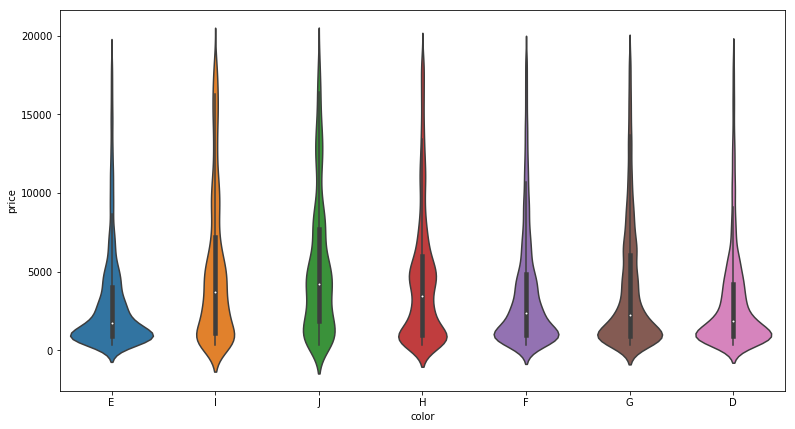

In [46]:
#change size of plot
plt.subplots(figsize=(13,7))
#violin plot shows the distribution of price for each color
sns.violinplot(x='color', y='price', data=df) 

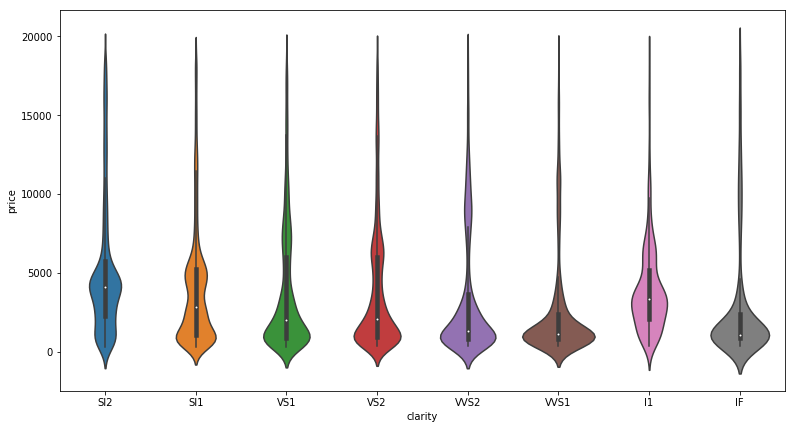

In [47]:
#change size of plot
plt.subplots(figsize=(13,7))
#violin plot shows the distribution of price for each color
sns.violinplot(x='clarity', y='price', data=df) 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

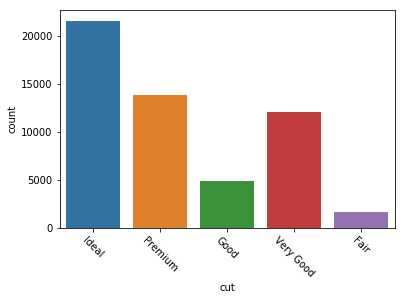

In [51]:
#create a bar plot of cut frequency
sns.countplot(x='cut',
              data=df)

plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

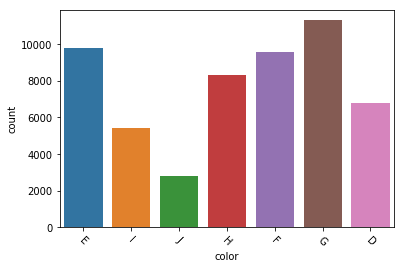

In [52]:
#create a bar plot of color frequency
sns.countplot(x='color',
              data=df)
#rotate x-axis label on chart
plt.xticks(rotation=-45)

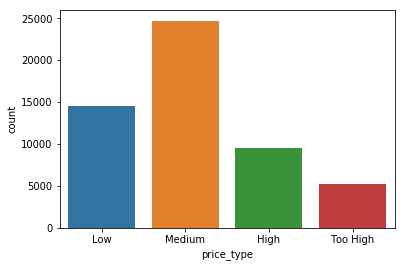

In [55]:
#count of the price groups I assigned
sns.countplot(x='price_type', data=df)

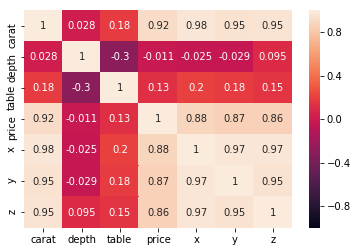

In [60]:
#show correlation of stats via heatmap
corr = df.corr()
sns.heatmap(corr, vmin=-1, annot=True)